In [1]:
#pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/c6/51/f140402202af6ce1bf747243f66415c5eb2f43ba2e2ac419a7e855d20673/streamlit-1.36.0-py2.py3-none-any.whl.metadata
  Using cached streamlit-1.36.0-py2.py3-none-any.whl.metadata (8.5 kB)
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/46/30/2118537233fa72c1d91a81f5908a7e843a6601ccc68b76838ebc4951505f/altair-5.3.0-py3-none-any.whl.metadata
  Using cached altair-5.3.0-py3-none-any.whl.metadata (9.2 kB)
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bb/2a/10164ed1f31196a2f7f3799368a821765c62851ead0e630ab52b8e14b4d0/blinker-1.8.2-py3-none-any.whl.metadata
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/fb/2b/a64c2d25a37aeb921fddb929111413049fc5f8b9a4c1aefaffaafe768d54/cachetools

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\markdown-it.exe' -> 'c:\\Python312\\Scripts\\markdown-it.exe.deleteme'


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
data = pd.read_excel('annthyroid_.xlsx')
data.head()

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label
0,0.45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,61.0,6.0,23.0,87.0,26.0,o
1,0.61,0,0,0,0,1,0,0,0,0,...,0,0,0,0,29.0,15.0,61.0,96.0,64.0,o
2,0.16,0,1,0,0,0,0,0,0,0,...,0,1,0,0,29.0,19.0,58.0,103.0,56.0,o
3,0.85,0,0,0,0,0,0,0,0,0,...,0,0,0,0,114.0,3.0,24.0,61.0,39.0,o
4,0.75,1,0,0,0,0,0,0,0,0,...,0,0,0,0,49.0,3.0,5.0,116.0,4.0,o


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6916 entries, 0 to 6915
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6916 non-null   float64
 1   Sex                        6916 non-null   int64  
 2   on_thyroxine               6916 non-null   int64  
 3   query_on_thyroxine         6916 non-null   int64  
 4   on_antithyroid_medication  6916 non-null   int64  
 5   sick                       6916 non-null   int64  
 6   pregnant                   6916 non-null   int64  
 7   thyroid_surgery            6916 non-null   int64  
 8   I131_treatment             6916 non-null   int64  
 9   query_hypothyroid          6916 non-null   int64  
 10  query_hyperthyroid         6916 non-null   int64  
 11  lithium                    6916 non-null   int64  
 12  goitre                     6916 non-null   int64  
 13  tumor                      6916 non-null   int64

In [26]:
data.describe()

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured
count,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,...,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000
mean,0.595098,0.307548,0.134615,0.015616,0.013158,0.038317,0.011278,0.014315,0.016773,0.062753,...,0.013013,0.008531,0.025448,0.000145,0.049740,1.603466,11.772446,94.253834,88.270139,95.257058
std,6.189326,0.461512,0.341337,0.123993,0.113959,0.191974,0.105606,0.118793,0.128428,0.242536,...,0.113339,0.091975,0.157494,0.012025,0.217422,14.047218,11.836250,50.555642,33.909845,55.031137
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.002500,0.050000,0.002400
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000680,0.020100,77.000000,83.000000,81.000000
50%,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001700,13.000000,101.000000,96.000000,105.000000
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002700,22.000000,123.000000,104.000000,125.000000
max,515.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,494.000000,95.000000,395.000000,233.000000,642.000000


In [27]:
data.drop(5659, inplace=True)

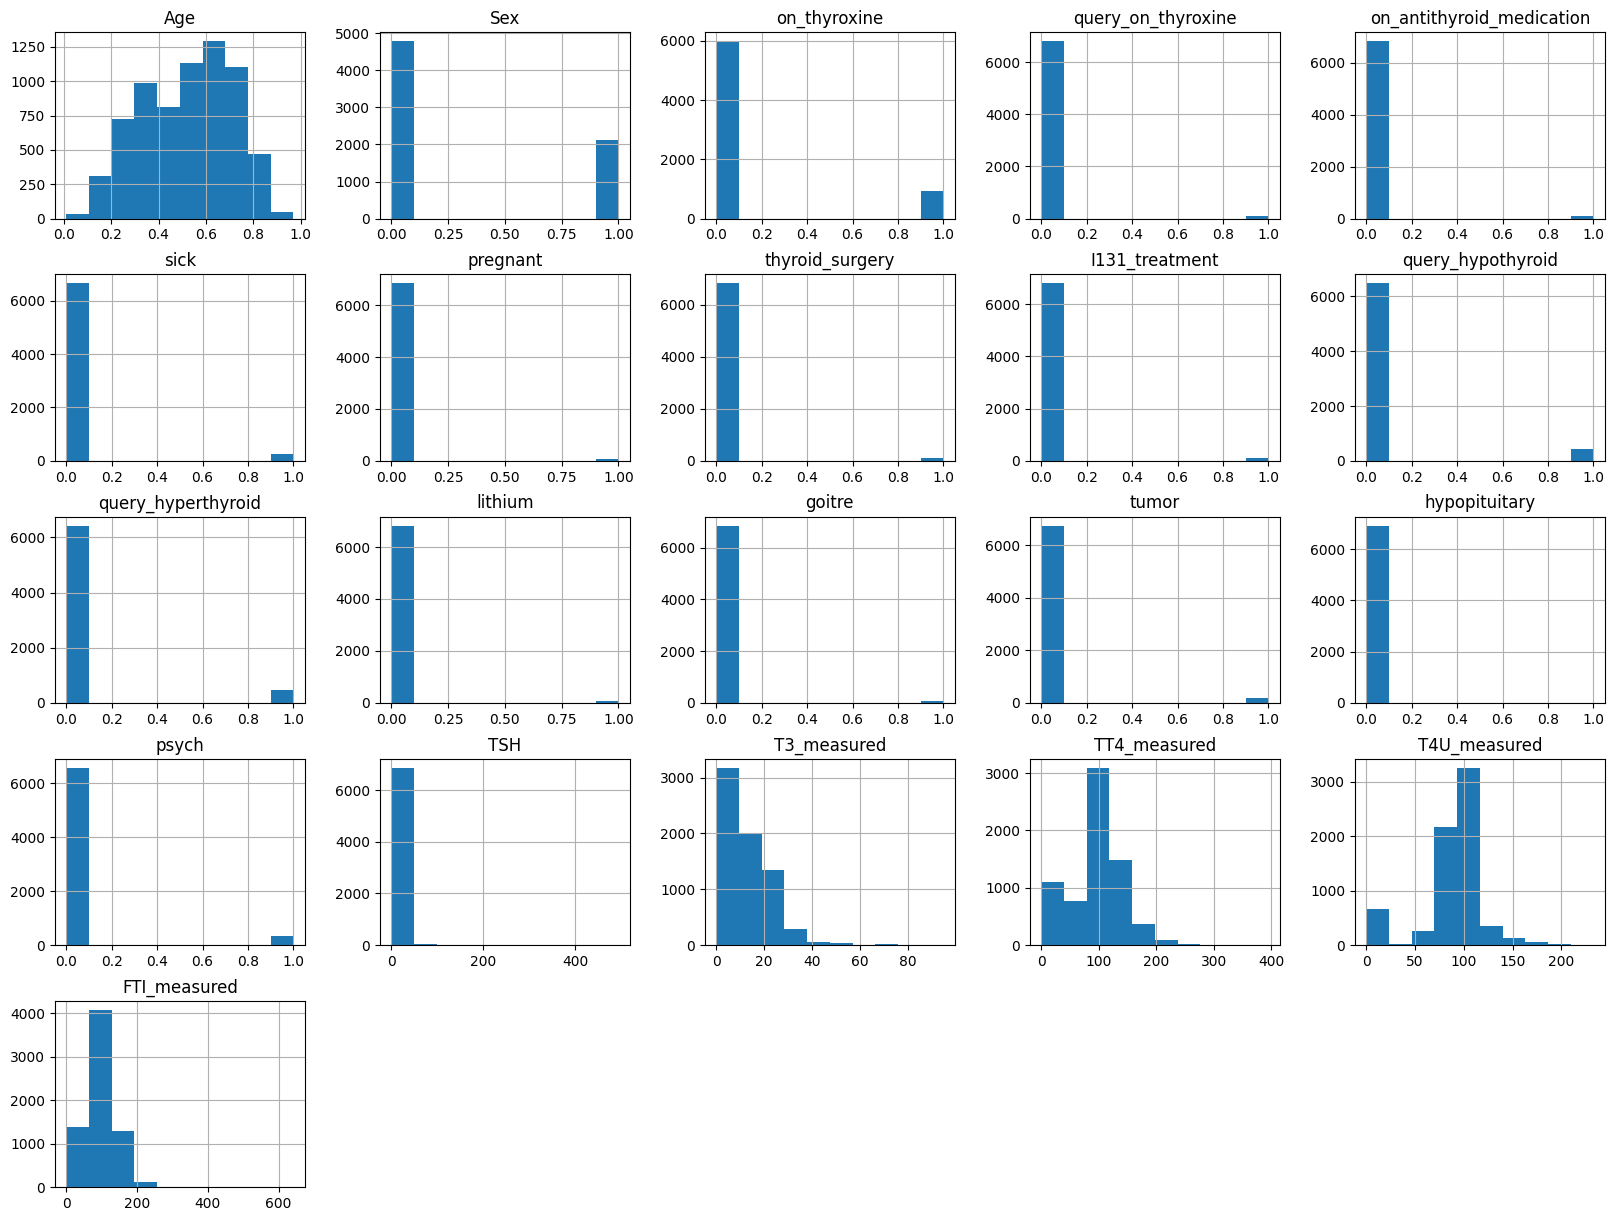

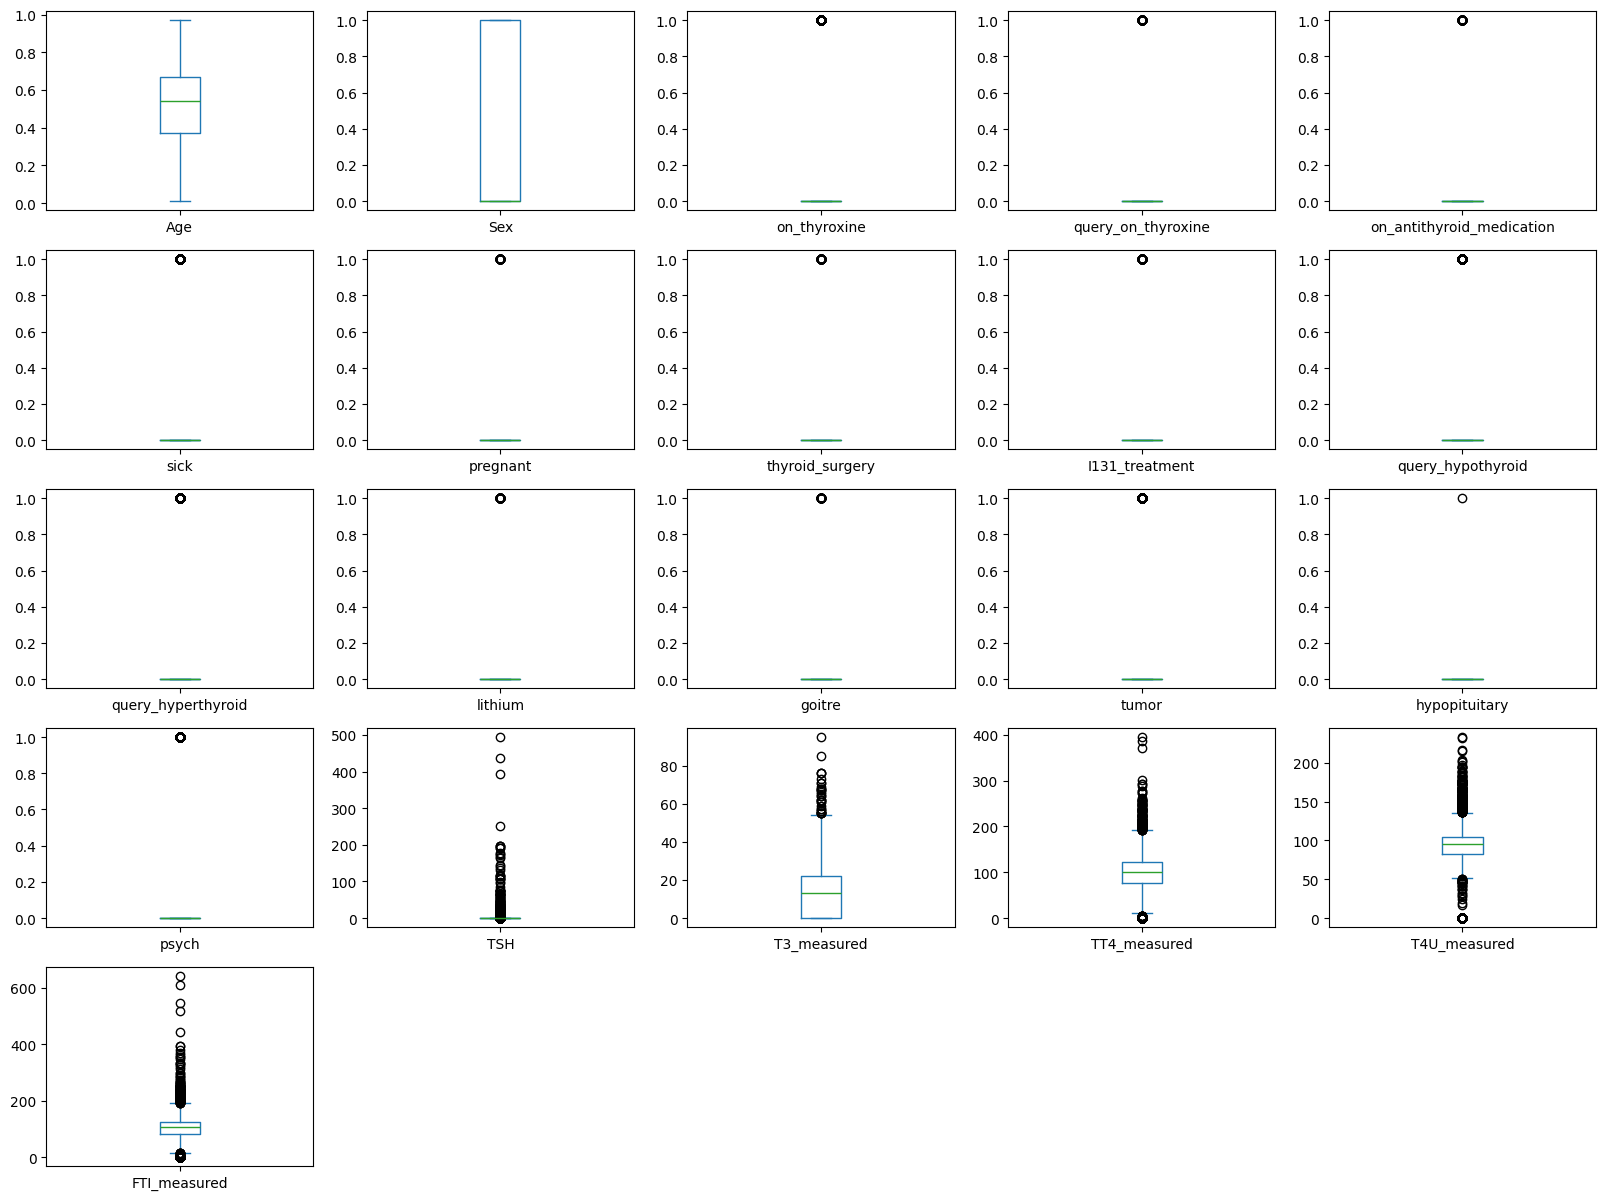

In [28]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
# Histograms for numerical features
data[numerical_cols].hist(figsize=(20, 15))
plt.show()

# Box plots for outlier detection
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols].plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 15), sharex=False, sharey=False)
plt.show()

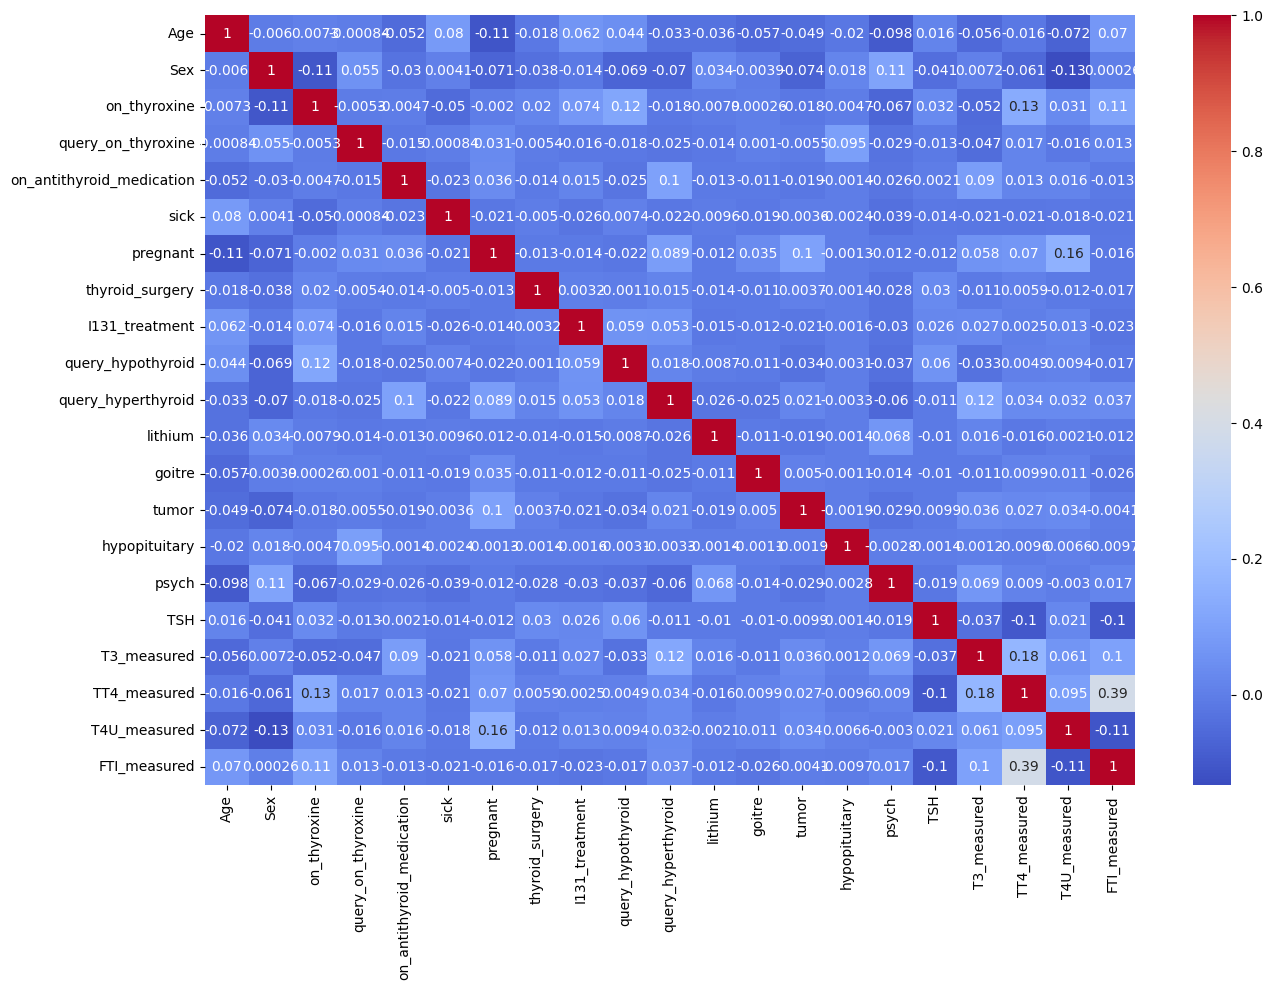

In [29]:
# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6915 entries, 0 to 6915
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6915 non-null   float64
 1   Sex                        6915 non-null   int64  
 2   on_thyroxine               6915 non-null   int64  
 3   query_on_thyroxine         6915 non-null   int64  
 4   on_antithyroid_medication  6915 non-null   int64  
 5   sick                       6915 non-null   int64  
 6   pregnant                   6915 non-null   int64  
 7   thyroid_surgery            6915 non-null   int64  
 8   I131_treatment             6915 non-null   int64  
 9   query_hypothyroid          6915 non-null   int64  
 10  query_hyperthyroid         6915 non-null   int64  
 11  lithium                    6915 non-null   int64  
 12  goitre                     6915 non-null   int64  
 13  tumor                      6915 non-null   int64  
 1

In [31]:
data.describe()

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured
count,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,...,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000
mean,0.520708,0.307592,0.134635,0.015618,0.013160,0.038322,0.011280,0.014317,0.016775,0.062762,...,0.013015,0.008532,0.025452,0.000145,0.049747,1.603698,11.774146,94.250400,88.266563,95.255794
std,0.189178,0.461530,0.341358,0.124002,0.113967,0.191988,0.105613,0.118801,0.128437,0.242552,...,0.113347,0.091982,0.157505,0.012026,0.217437,14.048221,11.836262,50.558492,33.910993,55.035016
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.002500,0.050000,0.002400
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000680,0.020100,77.000000,83.000000,81.000000
50%,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001700,13.000000,101.000000,96.000000,105.000000
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002700,22.000000,123.000000,104.000000,125.000000
max,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,494.000000,95.000000,395.000000,233.000000,642.000000


In [32]:
# Rename the column to remove the extra space
data.rename(columns={'Outlier_label ': 'Outlier_label'}, inplace=True)

# Encode the categorical target column
le = LabelEncoder()
data['Outlier_label'] = le.fit_transform(data['Outlier_label'])

# Split the data into features and target
X = data.drop('Outlier_label', axis=1)
y = data['Outlier_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5532, 21), (1383, 21), (5532,), (1383,))

In [33]:
# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-NN': KNeighborsClassifier()
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.967462   0.964908  0.967462  0.958816
Decision Tree        0.992046   0.991986  0.992046  0.992013
Random Forest        0.986262   0.985747  0.986262  0.985428
SVM                  0.966016   0.964606  0.966016  0.955530
Gradient Boosting    0.994215   0.994687  0.994215  0.994351
k-NN                 0.969631   0.967690  0.969631  0.962448


In [34]:
# Train the best model
best_model = GradientBoostingClassifier()
best_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']